In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

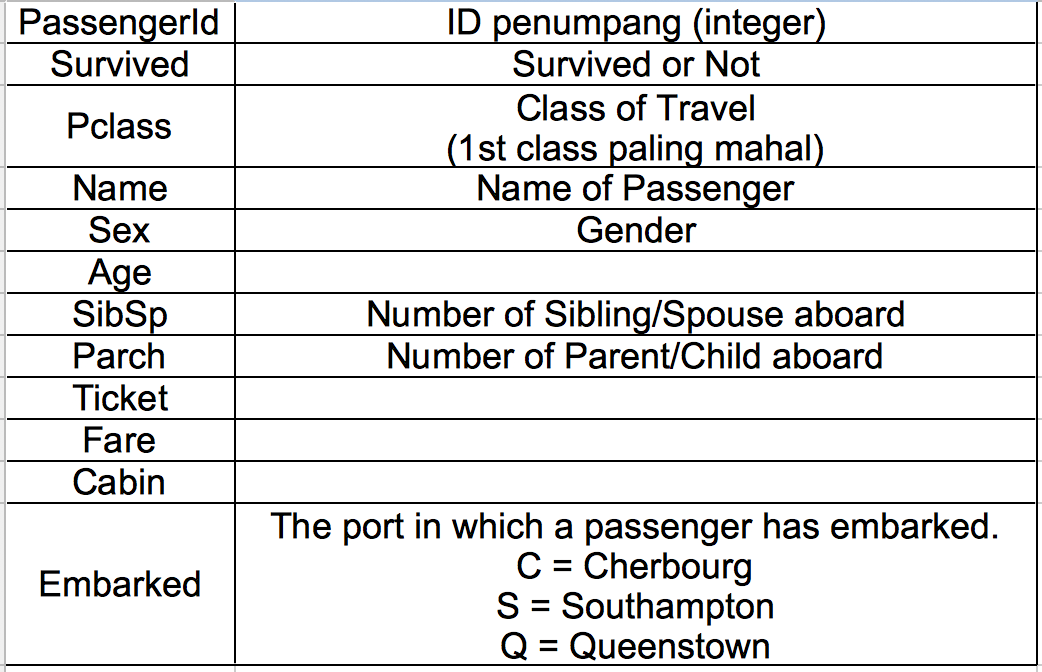

In [2]:
illustration.nomenklatur

In [3]:
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


# Quick Exploratory Data Analysis (Quick EDA)

In [6]:
from jcopml.plot import plot_missing_value

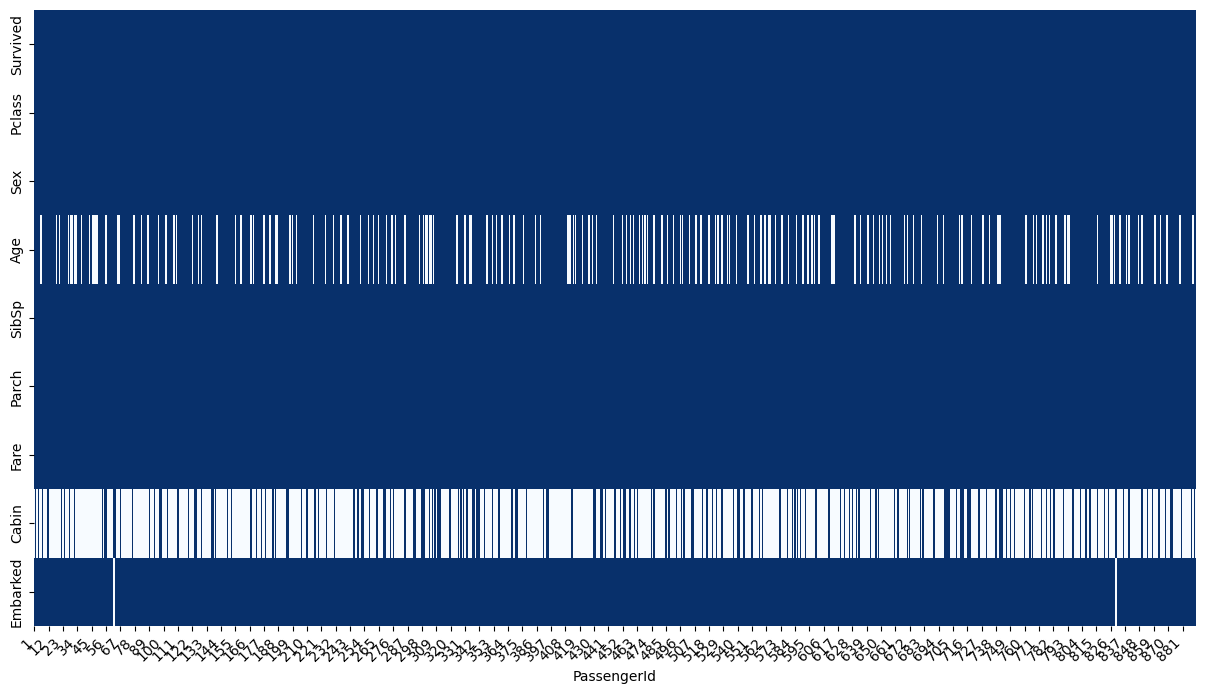

In [7]:
plot_missing_value(df)

In [8]:
df.drop(columns=['Age', 'Cabin'], inplace=True)

In [9]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df.fillna({'Embarked':'S'}, inplace=True)

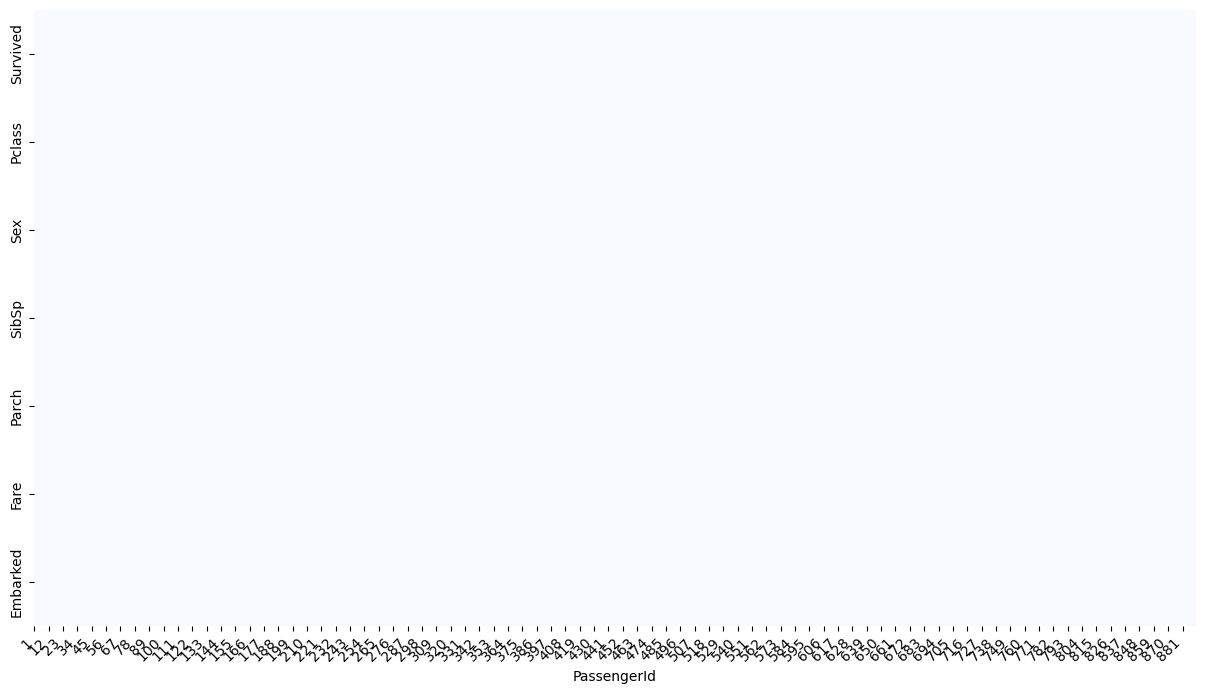

In [11]:
plot_missing_value(df)

# Persiapan Data

In [12]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [13]:
X = df.drop(columns='Survived')
y = df.Survived

X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'])
# kolom kategorikal harus di encode karena mesin hanya menerima angka

In [14]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1


In [15]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [16]:
import seaborn as sns

E:\anaconda3\envs\jcopdl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\envs\jcopdl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

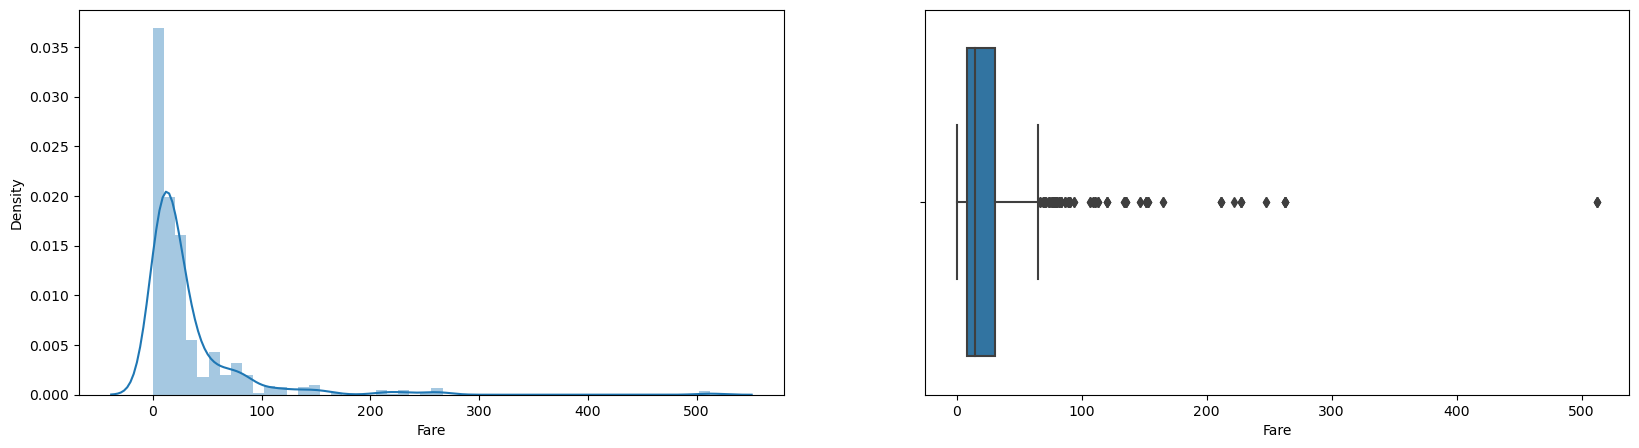

In [17]:
f = plt.figure(figsize=(20,5))

f.add_subplot(1,2,1)
sns.distplot(df['Fare'])

f.add_subplot(1,2,2)
sns.boxplot(df['Fare'])

# Intro Scikit-Learn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.score(X, y)

0.8787878787878788

# Concept 1: Dataset Splitting

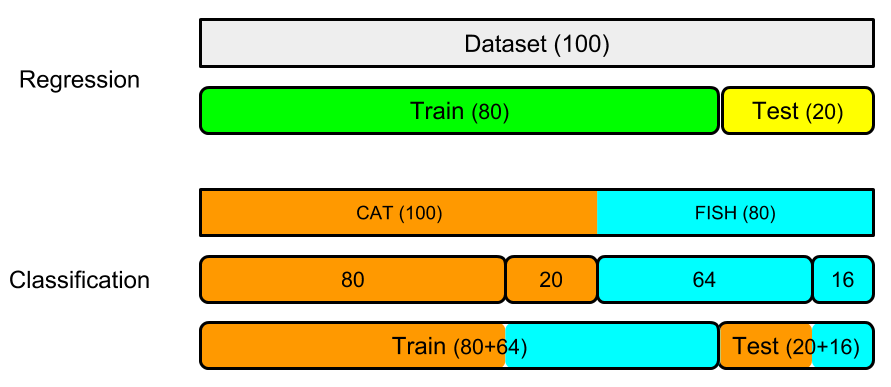

In [21]:
illustration.train_test_split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(columns='Survived')
y = df.Survived

X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [24]:
Knn = KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
Knn.score(X_train, y_train), Knn.score(X_test, y_test)

(0.9101123595505618, 0.7262569832402235)

# Concept 2: K-fold Cross Validation

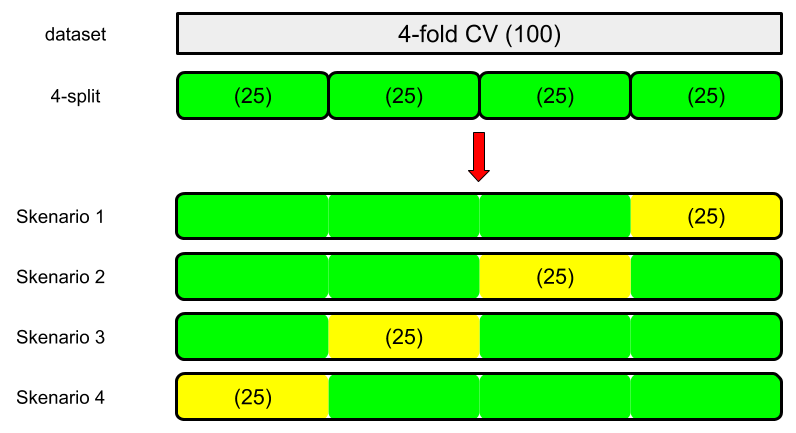

In [26]:
illustration.kfold_cv

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
Knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(Knn, X, y, cv=5)

array([0.63687151, 0.63483146, 0.80337079, 0.73033708, 0.71348315])

In [29]:
cross_val_score(Knn, X, y, cv=5).mean()

0.703778796058

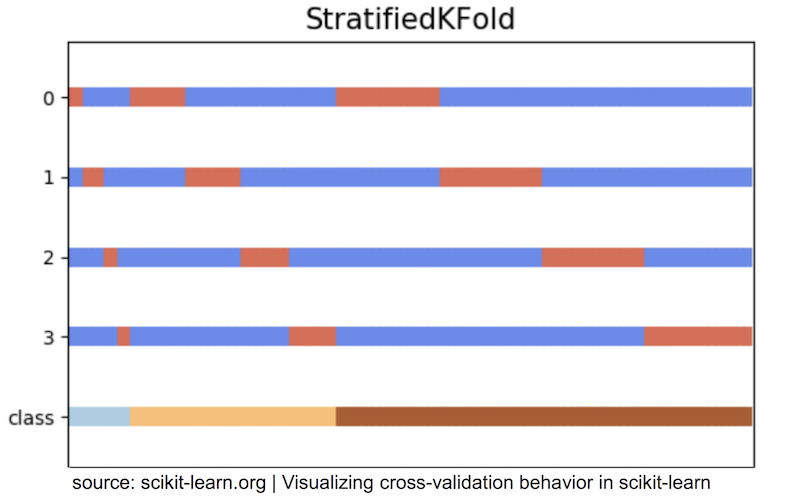

In [2]:
illustration.strat_kfold_cv

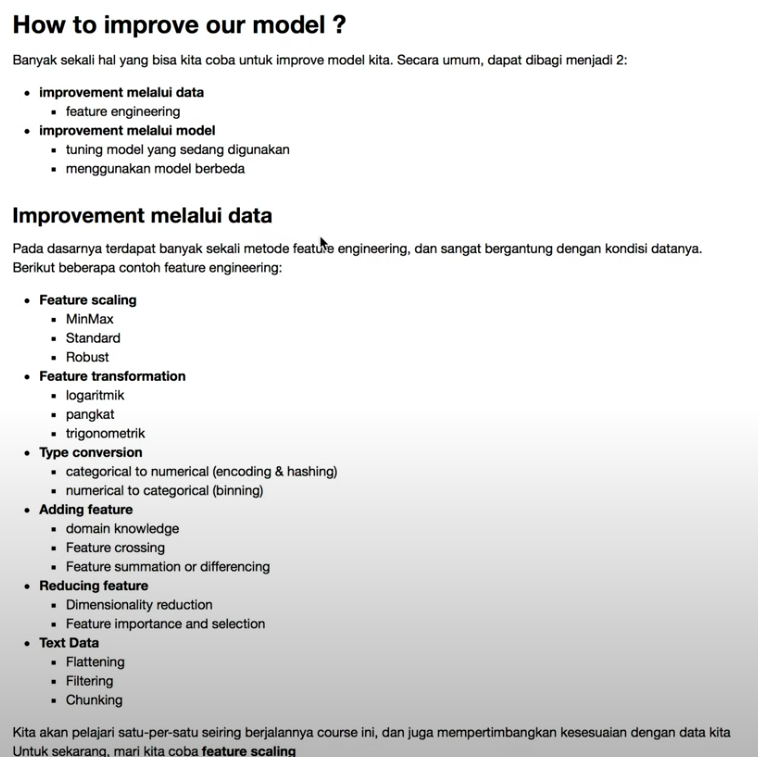

# Improvement melalui data: Feature Scaling

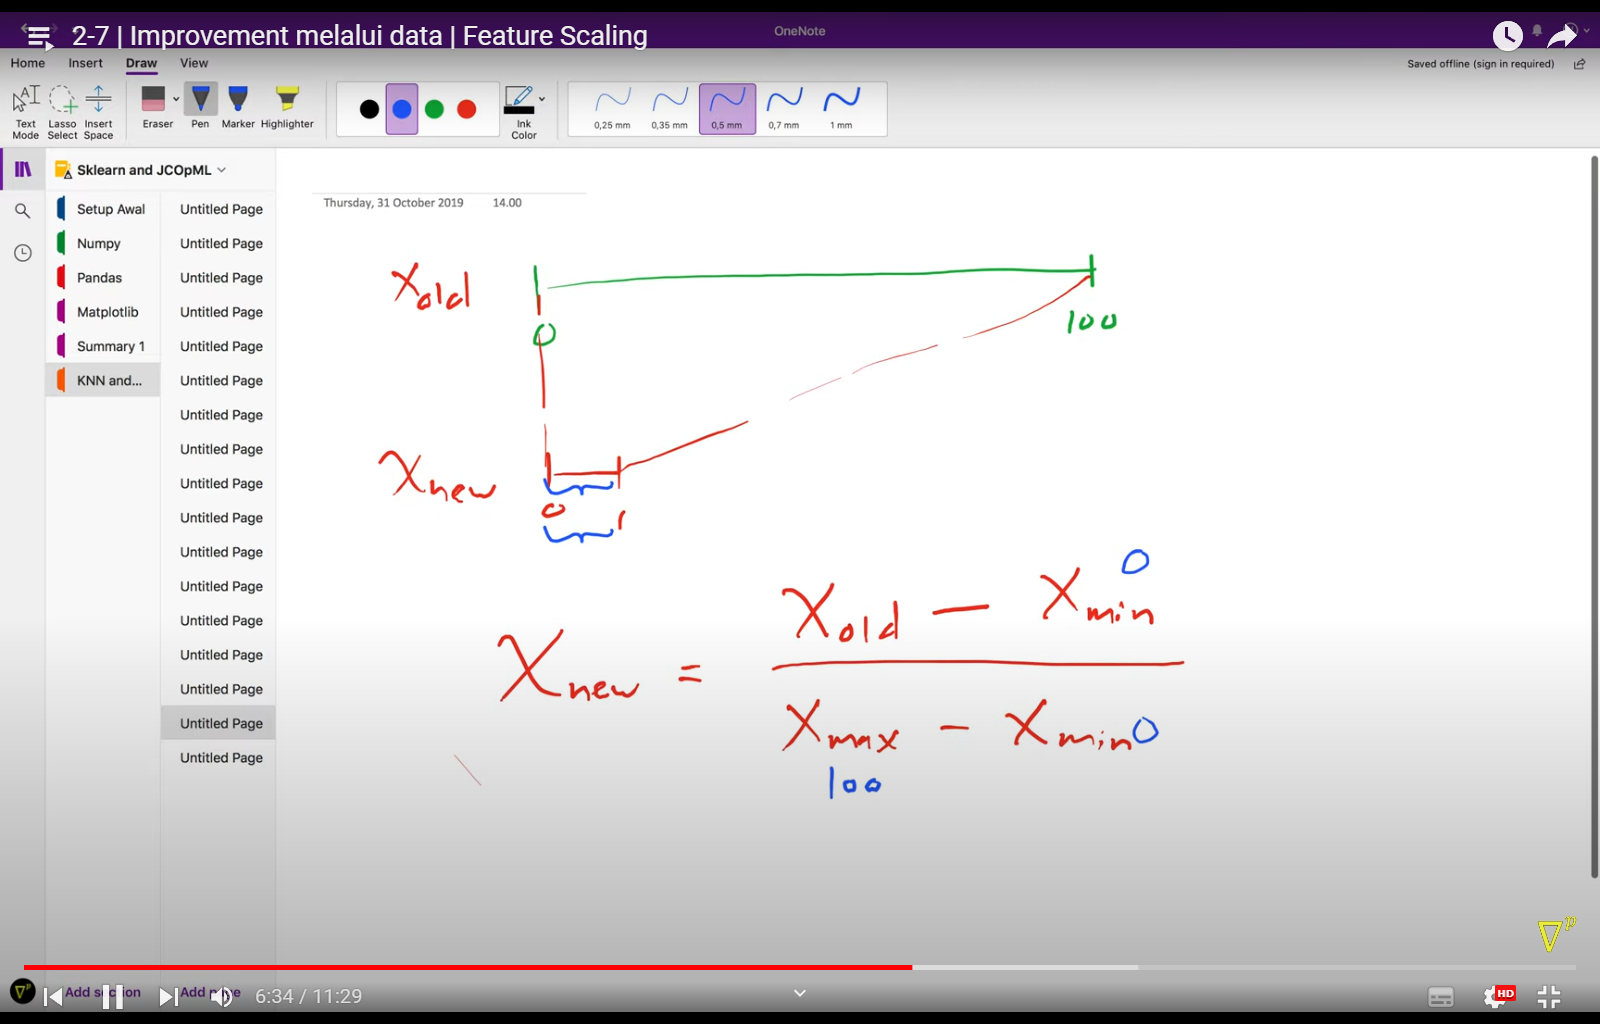

In [30]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

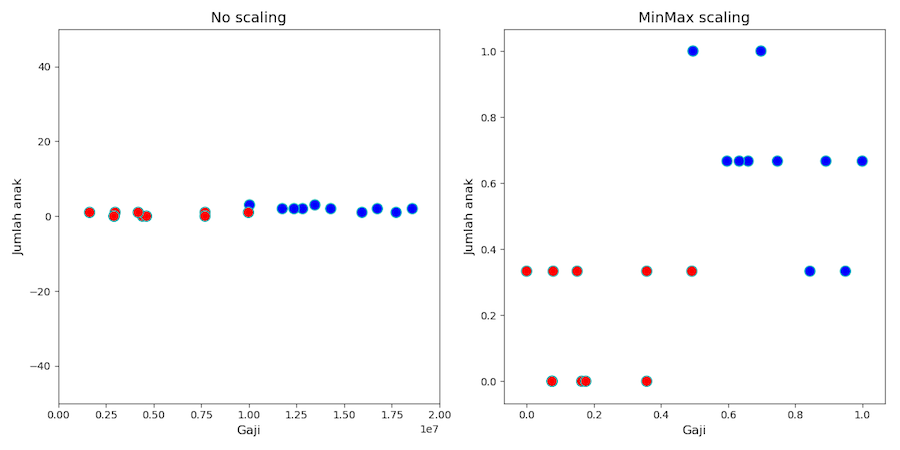

In [31]:
illustration.knn_scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

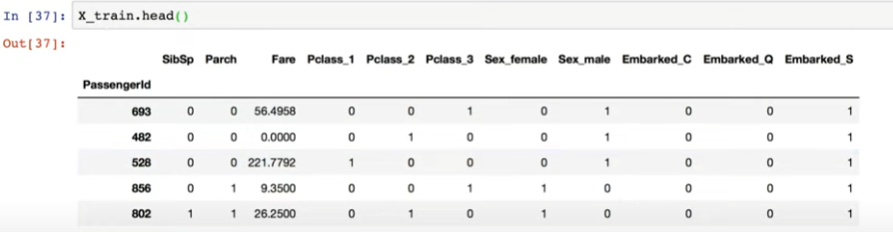

In [34]:
scaler.data_max_

array([  8.    ,   6.    , 512.3292,   1.    ,   1.    ,   1.    ,
         1.    ,   1.    ,   1.    ,   1.    ,   1.    ])

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
Knn = KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
Knn.score(X_train_scaled, y_train), Knn.score(X_test_scaled, y_test)

(0.8890449438202247, 0.6983240223463687)

# Improvement melalui model: Parameter Tuning

### Tuning n_neighbor tanpa scaling

Max test score: 0.7541899441340782
n_neighbors: 3


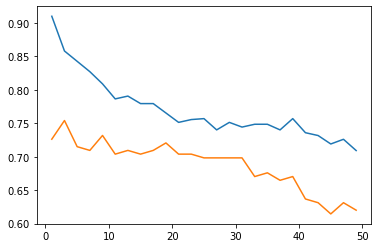

In [44]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    Knn = KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_train, y_train)
    
    train_score.append(Knn.score(X_train, y_train))
    test_score.append(Knn.score(X_test, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbors: {neighbor[np.argmax(test_score)]}")

### Tuning n_neighbor pakai scaling

Max test score: 0.7988826815642458
n_neighbors: 29


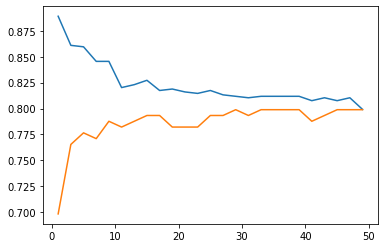

In [45]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    Knn = KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_train_scaled, y_train)
    
    train_score.append(Knn.score(X_train_scaled, y_train))
    test_score.append(Knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbors: {neighbor[np.argmax(test_score)]}")

### Tuning n_neighbor dengan weight by distance

Max test score: 0.7988826815642458
n_neighbors: 49


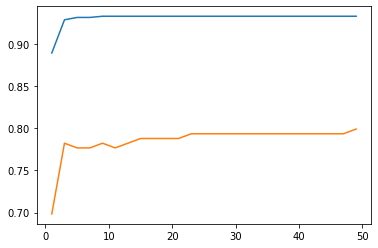

In [47]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    Knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    Knn.fit(X_train_scaled, y_train)
    
    train_score.append(Knn.score(X_train_scaled, y_train))
    test_score.append(Knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbors: {neighbor[np.argmax(test_score)]}")

# Pakai Manhattan Distance

Max test score: 0.7932960893854749
n_neighbors: 23


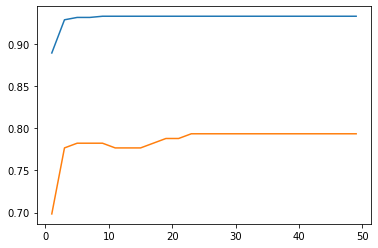

In [48]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    Knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    Knn.fit(X_train_scaled, y_train)
    
    train_score.append(Knn.score(X_train_scaled, y_train))
    test_score.append(Knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbors: {neighbor[np.argmax(test_score)]}")

p = 1, manhattan
p = 2, euclidean
p = 1.5 ??
